## Study case missing time related data

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
f = open('glucose.json')
dj = json.load(f)
glucose = pd.read_json(dj, orient='records')
glucose.head()

,ID,time,recordtype,glucose
0,2845.0,2019-04-25 00:08,1,109
1,2850.0,2019-04-25 00:50,1,
2,2877.0,2019-04-25 07:02,1,123
3,2881.0,2019-04-25 07:34,1,158
4,2886.0,2019-04-25 08:19,1,


In [3]:
glucose.head()

,ID,time,recordtype,glucose
0,2845.0,2019-04-25 00:08,1,109
1,2850.0,2019-04-25 00:50,1,
2,2877.0,2019-04-25 07:02,1,123
3,2881.0,2019-04-25 07:34,1,158
4,2886.0,2019-04-25 08:19,1,


In [4]:
glucose['glucose'] = pd.to_numeric(glucose['glucose'], errors='coerce')
glucose['time'] = pd.to_datetime(glucose['time'], errors='coerce')
glucose['ID'] = glucose['ID'].astype(int)

In [5]:
glucose.dtypes

ID                     int64
time          datetime64[ns]
recordtype             int64
glucose              float64
dtype: object

In [6]:
glucose.head()

,ID,time,recordtype,glucose
0,2845,2019-04-25 00:08:00,1,109.0
1,2850,2019-04-25 00:50:00,1,NaN
2,2877,2019-04-25 07:02:00,1,123.0
3,2881,2019-04-25 07:34:00,1,158.0
4,2886,2019-04-25 08:19:00,1,NaN


In [7]:
glucose = glucose.set_index(['time'])
glucose = glucose.sort_index()
glucose = glucose.reset_index()
glucose.head()

,time,ID,recordtype,glucose
0,2019-04-25 00:08:00,2845,1,109.0
1,2019-04-25 00:14:00,-9223372036854775808,0,NaN
2,2019-04-25 00:29:00,-9223372036854775808,0,NaN
3,2019-04-25 00:44:00,-9223372036854775808,0,NaN
4,2019-04-25 00:50:00,2850,1,NaN


In [8]:
glucose.groupby('recordtype')['glucose'].mean()

recordtype
0           NaN
1    123.403846
Name: glucose, dtype: float64

In [9]:
len(glucose)

136

In [10]:
glucose.glucose.isna().mean()

0.6176470588235294

In [11]:
glucose['interpolated']= glucose['glucose'].interpolate(method='linear')
glucose.head()

,time,ID,recordtype,glucose,interpolated
0,2019-04-25 00:08:00,2845,1,109.0,109.000000
1,2019-04-25 00:14:00,-9223372036854775808,0,NaN,109.466667
2,2019-04-25 00:29:00,-9223372036854775808,0,NaN,109.933333
3,2019-04-25 00:44:00,-9223372036854775808,0,NaN,110.400000
4,2019-04-25 00:50:00,2850,1,NaN,110.866667


In [12]:
full = glucose[glucose['glucose'] > 0]
empty = glucose[glucose['glucose'].isna()]
glucose['roll'] = glucose.interpolated.rolling(10).mean()
glucose.head(10)

,time,ID,recordtype,glucose,interpolated,roll
0,2019-04-25 00:08:00,2845,1,109.0,109.000000,NaN
1,2019-04-25 00:14:00,-9223372036854775808,0,NaN,109.466667,NaN
2,2019-04-25 00:29:00,-9223372036854775808,0,NaN,109.933333,NaN
3,2019-04-25 00:44:00,-9223372036854775808,0,NaN,110.400000,NaN
4,2019-04-25 00:50:00,2850,1,NaN,110.866667,NaN
5,2019-04-25 00:59:00,-9223372036854775808,0,NaN,111.333333,NaN
6,2019-04-25 01:14:00,-9223372036854775808,0,NaN,111.800000,NaN
7,2019-04-25 01:29:00,-9223372036854775808,0,NaN,112.266667,NaN
8,2019-04-25 01:44:00,-9223372036854775808,0,NaN,112.733333,NaN
9,2019-04-25 01:59:00,-9223372036854775808,0,NaN,113.200000,111.1


In [13]:
import matplotlib.pyplot as plt 


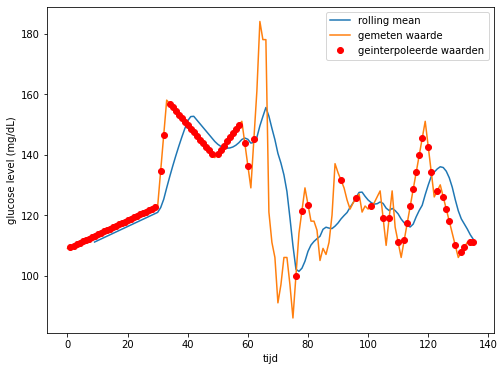

In [14]:
plt.figure(figsize=(8, 6))

plt.ylabel('glucose level (mg/dL)')
plt.xlabel('tijd')

plt.plot(glucose['roll'], label = 'rolling mean')
plt.plot(full['glucose'], label = 'gemeten waarde')
plt.plot(empty['interpolated'], 'ro', label = 'geinterpoleerde waarden')
plt.legend()
plt.show()